In [21]:
from __future__ import print_function, division, absolute_import
import os,sys
import numpy as np
import time
from mpl_toolkits.mplot3d.axes3d import *
import matplotlib.pyplot as plt
import time
import h5py
import itertools
import orbithunter.persistent_homology as orbgudhi
sys.path.insert(0, "C:\\Users\\Matt\\Desktop\\orbithunter\\")
import orbithunter as orb

In [22]:
minimal_cover = orb.read_h5('./data/minimal_cover.h5')
base = orb.read_h5('./data/small_patches.h5', '0').transform(to='field')
entire_covering = [] 
for orbit in minimal_cover:
    entire_covering.extend([orbit,  orbit.to_fundamental_domain(), orbit.abs(), orbit.abs().to_fundamental_domain()])

all_persistences = []
pdim = (False, False)
for each_orbit in entire_covering:
    all_persistences.append(orbgudhi.orbit_complex(each_orbit, periodic_dimensions=pdim
                                                 ).persistence(min_persistence=0.01))


orbgudhi.persistence_distance(orbit, orbit.abs(), periodic_dimensions=(False, False), min_persistence=0.1)

2.5238857709729436

In [23]:
base = orb.read_h5('./data/small_patches.h5', '0').transform(to='field')
base_slice = orb.OrbitKS(state=base.state[:32, :32], parameters=(base.t/4, base.x/4, 0), basis='field')
p1 = orbgudhi.orbit_persistence(base_slice, min_persistence=0.01, periodic_dimensions=(False, False))

In [26]:
base_pcc = orbgudhi.orbit_complex(base_slice, periodic_dimensions=(False, False))
base_pcc.compute_persistence( min_persistence=0.01)

In [37]:
pdim = (False, False)
bottleneck_distribution = []
wasserstein_distribution = []
for x in minimal_cover[0].group_orbit():
    bottleneck_distribution.append(orbgudhi.persistence_distance(x, base_slice,
                                                          periodic_dimensions=(False, False),
                                                          min_persistence=0.1))
    wasserstein_distribution.append(orbgudhi.persistence_distance(x, base_slice, periodic_dimensions=(False, False),
                                                                                              min_persistence=0.1,
                                                                                             gudhi_metric='wasserstein'))

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


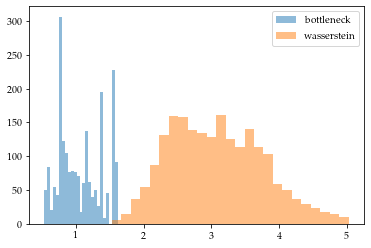

In [38]:
plt.figure()
plt.hist(bottleneck_distribution, bins=25, alpha=0.5, label='bottleneck')
plt.hist(wasserstein_distribution, bins=25, alpha=0.5, label='wasserstein')
plt.legend()
plt.show()
plt.close()

In [41]:
pdim = (False, False)
bottleneck_fundamental_distribution = []
wasserstein_fundamental_distribution = []
for x in minimal_cover[0].group_orbit(fundamental_domain=True):
    bottleneck_fundamental_distribution.append(orbgudhi.persistence_distance(x, base_slice,
                                                          periodic_dimensions=(False, False),
                                                          min_persistence=0.1))
    wasserstein_fundamental_distribution.append(orbgudhi.persistence_distance(x, base_slice, periodic_dimensions=(False, False),
                                                                                              min_persistence=0.1,
                                                                                             gudhi_metric='wasserstein'))

In [42]:
np.std(bottleneck_fundamental_distribution), np.std(wasserstein_fundamental_distribution)

(0.357919264232882, 0.6929709767979134)

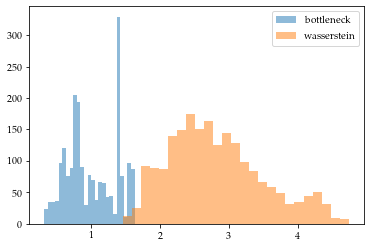

In [43]:
plt.figure()
plt.hist(bottleneck_fundamental_distribution, bins=25, alpha=0.5, label='bottleneck')
plt.hist(wasserstein_fundamental_distribution, bins=25, alpha=0.5, label='wasserstein')
plt.legend()
plt.show()
plt.close()

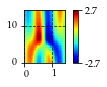

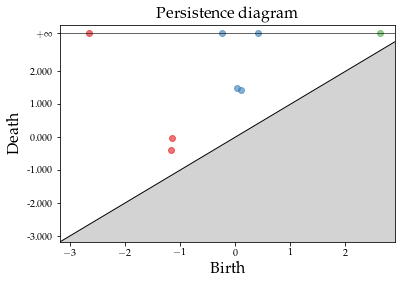

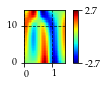

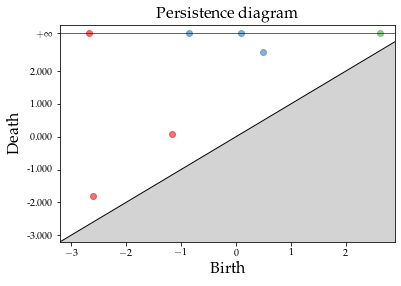

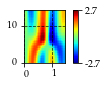

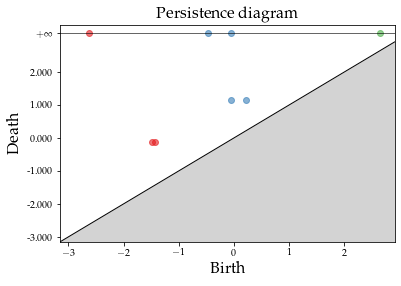

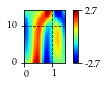

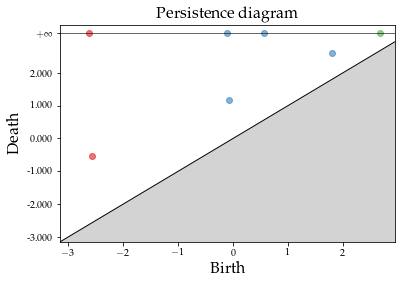

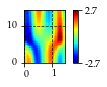

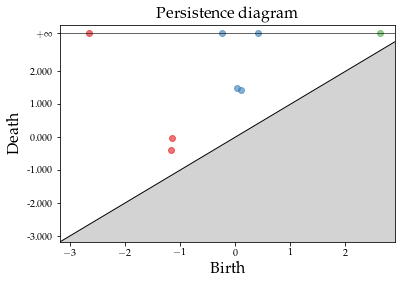

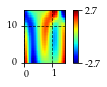

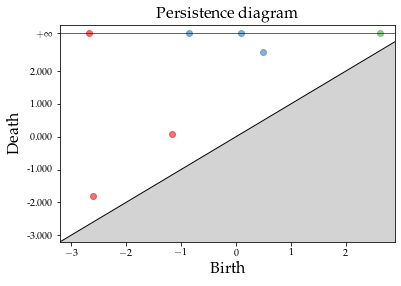

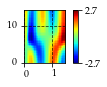

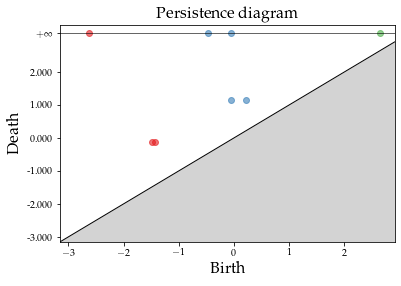

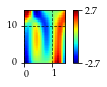

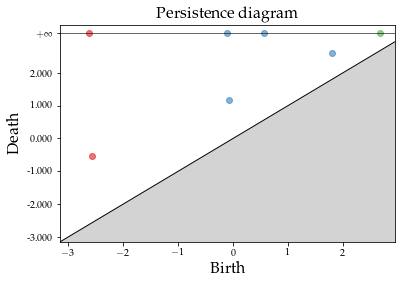

In [44]:
for x in minimal_cover[0].group_orbit(discrete=True, fundamental_domain=True):
    x.plot()
    orbgudhi.persistence_plot(x, min_persistence=0.5, periodic_dimensions=(True, True))

In [ ]:
for x in minimal_cover[0].group_orbit(discrete=True, fundamental_domain=False):
    x.plot()
    orbgudhi.persistence_plot(x, min_persistence=0.01, periodic_dimensions=(False, False))

In [ ]:

homology_scores = np.zeros([len(all_persistences),len(all_persistences)])
for i in range(len(all_persistences)):
    for j in range(i, len(all_persistences)):
        homology_scores[i, j] = ohgudhi.gudhi_distance_from_persistence(all_persistences[i], 
                                                                                 all_persistences[j],
                                                                                 metric='bottleneck')
        
homology_scores = homology_scores.reshape(len(all_persistences),len(all_persistences))

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(homology_scores, interpolation='none')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,10))
plt.imshow((homology_scores+homology_scores.T), interpolation='none')
plt.colorbar()
plt.show()

plt.imshow(((homology_scores+homology_scores.T) < 0.5).astype(int), interpolation='none')
plt.colorbar()
plt.show()

In [ ]:
ohgudhi.gudhi_plot(defect, min_persistence=0.5, periodic_dimensions=(True, True))

ohgudhi.gudhi_plot(defect, min_persistence=0.5, periodic_dimensions=(False, True))

ohgudhi.gudhi_plot(defect, min_persistence=0.5, periodic_dimensions=(True, False))

ohgudhi.gudhi_plot(defect, min_persistence=0.5, periodic_dimensions=(False, False))

In [ ]:
ohgudhi.gudhi_plot(defect.to_fundamental_domain(), min_persistence=0.5, periodic_dimensions=(True, True))

ohgudhi.gudhi_plot(defect.to_fundamental_domain(), min_persistence=0.5, periodic_dimensions=(False, True))

ohgudhi.gudhi_plot(defect.to_fundamental_domain(), min_persistence=0.5, periodic_dimensions=(True, False))

ohgudhi.gudhi_plot(defect.to_fundamental_domain(), min_persistence=0.5, periodic_dimensions=(False, False))

In [ ]:
ohgudhi.gudhi_plot(defect.abs(), min_persistence=0.5, periodic_dimensions=(True, True))

ohgudhi.gudhi_plot(defect.abs(), min_persistence=0.5, periodic_dimensions=(False, True))

ohgudhi.gudhi_plot(defect.abs(), min_persistence=0.5, periodic_dimensions=(True, False))

ohgudhi.gudhi_plot(defect.abs(), min_persistence=0.5, periodic_dimensions=(False, False))

In [ ]:
ohgudhi.gudhi_plot(defect.abs().to_fundamental_domain(), min_persistence=0.5, periodic_dimensions=(True, True))

ohgudhi.gudhi_plot(defect.abs().to_fundamental_domain(), min_persistence=0.5, periodic_dimensions=(False, True))

ohgudhi.gudhi_plot(defect.abs().to_fundamental_domain(), min_persistence=0.5, periodic_dimensions=(True, False))

ohgudhi.gudhi_plot(defect.abs().to_fundamental_domain(), min_persistence=0.5, periodic_dimensions=(False, False))